In [1]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [4]:
from tensorflow.keras.layers import Input, Dense, SimpleRNN, GRU, LSTM, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# Load in the data

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape)
print(x_train[0].shape)
# Shape is of N x T x D = 60000 x 28 x 28
T = 28
D = 28

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(28, 28)


In [24]:
# Number of output classes
K = len(set(y_train))
print("# of classes: ", K)

# of classes:  10


In [27]:
# Instantiate the model

i = Input(shape=(T, D))

x = LSTM(128)(i)

x = Dense(10, activation='softmax')(x)

model = Model(i, x)

In [29]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the RNN
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 54s 28ms/step - loss: 0.3376 - accuracy: 0.8914 - val_loss: 0.1469 - val_accuracy: 0.9543
Epoch 2/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1064 - accuracy: 0.9676 - val_loss: 0.1002 - val_accuracy: 0.9696
Epoch 3/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0744 - accuracy: 0.9777 - val_loss: 0.0684 - val_accuracy: 0.9795
Epoch 4/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0573 - accuracy: 0.9832 - val_loss: 0.0705 - val_accuracy: 0.9783
Epoch 5/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0457 - accuracy: 0.9858 - val_loss: 0.0571 - val_accuracy: 0.9833
Epoch 6/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0381 - accuracy: 0.9885 - val_loss: 0.0453 - val_accuracy: 0.9862
Epoch 7/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0328 - accuracy: 0.9898 - val_loss: 0.0411 -

AttributeError: ignored

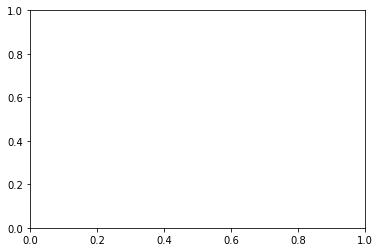

In [30]:
plt.plot(r.history['accuracy'], lable='accuracy')
plt.plot(r.history['val_accuracy'], label='validation_accuracy')
plt.legend()